In [19]:
from scipy.optimize import differential_evolution
import numpy as np

# 用户参数和系统参数
antenna_gains_db = np.array([15, 12, 13, 10, 20, 11])
channel_gains_db = np.array([-100, -105, -105, -115, -120, -125])
total_power = 30
bandwidth = 20e6
noise_power_density = -174
noise_power = 10 ** ((noise_power_density - 30) / 10) * bandwidth
channel_gains = 10 ** ((channel_gains_db + 130) / 10)

# 目标函数
def objective(P):
    rates = np.zeros(4)
    eavesdropper_rates = np.zeros(2)
    total_power_transmitted = np.sum(P)

    for i in range(4):  # 正常用户
        interference = total_power_transmitted - P[i]
        SINR = P[i] * channel_gains[i] / (interference + noise_power)
        rates[i] = np.log2(1 + SINR) if SINR > 0 else 0

    for i in range(2):  # 窃听者
        interference = total_power_transmitted - P[i+4]
        SINR = P[i+4] * channel_gains[i+4] / (interference + noise_power)
        eavesdropper_rates[i] = np.log2(1 + SINR) if SINR > 0 else 0

    secure_rates = rates - np.sum(eavesdropper_rates)
    total_secure_rate = np.sum(secure_rates)
    return -total_secure_rate  # 最小化

# 设置搜索范围
bounds = [(0.1, total_power / 2) for _ in range(6)]

# 执行差分进化算法
result = differential_evolution(objective, bounds, strategy='best1bin', maxiter=1000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7)
print("最优功率分配：", result.x)
print("最大化的总安全容量：", -result.fun)


最优功率分配： [15.         15.         15.         13.61212803  0.1         0.1       ]
最大化的总安全容量： 25.23411287837915


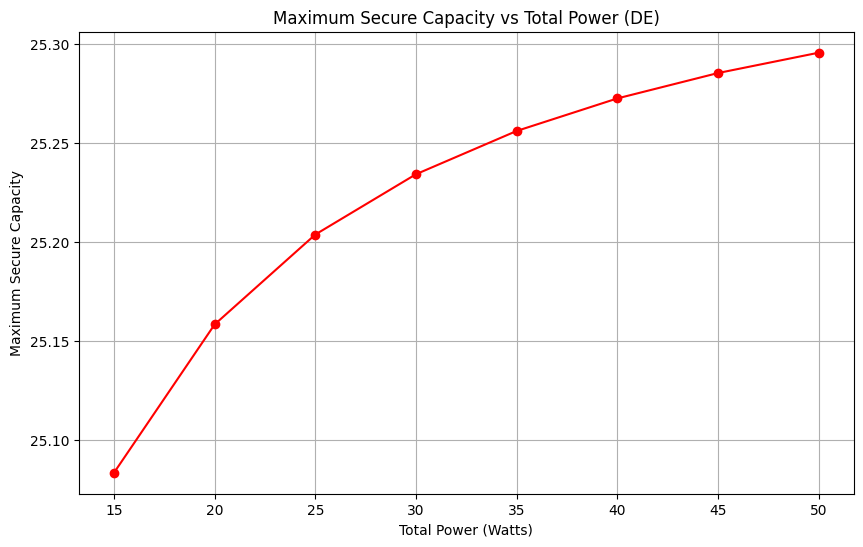

In [16]:
from scipy.optimize import differential_evolution
import numpy as np
import matplotlib.pyplot as plt

# 用户参数
antenna_gains_db = np.array([15, 12, 13, 10, 20, 11])
required_rates = np.array([10, 5, 0, 3, 1, 0])
channel_gains_db = np.array([-100, -105, -105, -115, -120, -125])

# 系统参数
bandwidth = 20e6
noise_power_density = -174
noise_power = 10 ** ((noise_power_density - 30) / 10) * bandwidth

# 转换信道增益为线性值
channel_gains = 10 ** ((channel_gains_db + 130) / 10)

# 存储最大安全容量结果
total_powers = np.arange(15, 51, 5)
max_safe_capacities_ga = []

# 定义目标函数
def objective_ga(P):
    rates = np.zeros(4)
    eavesdropper_rates = np.zeros(2)
    total_power_transmitted = np.sum(P)

    for i in range(4):  # 正常用户
        interference = total_power_transmitted - P[i]
        SINR = P[i] * channel_gains[i] / (interference + noise_power)
        rates[i] = np.log2(1 + SINR)

    for i in range(2):  # 窃听者
        interference = total_power_transmitted - P[i+4]  # eavesdropper indices are 4 and 5
        SINR = P[i+4] * channel_gains[i+4] / (interference + noise_power)
        eavesdropper_rates[i] = np.log2(1 + SINR)

    secure_rates = rates - np.sum(eavesdropper_rates)
    total_secure_rate = np.sum(secure_rates)
    return -total_secure_rate  # 返回负值以供最小化

# 遍历不同的总功率设置
for total_power in total_powers:
    bounds = [(0.1, total_power / 2) for _ in range(6)]
    result = differential_evolution(objective_ga, bounds, strategy='best1bin', maxiter=1000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7)
    max_safe_capacities_ga.append(-result.fun)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(total_powers, max_safe_capacities_ga, marker='o', linestyle='-', color='r')
plt.title("Maximum Secure Capacity vs Total Power (DE)")
plt.xlabel("Total Power (Watts)")
plt.ylabel("Maximum Secure Capacity")
plt.grid(True)
plt.show()
